Harmonic Oscillator Coherent States
----------------------------------------

This notebook shows some properties of harmonic oscillator coherent states (see also
homework problem 7.2). Such states are minimal-uncertainty wave functions: just like the ground state,
they satisfy

$$ (\Delta x)^2 (\Delta p)^2 = \frac{\hbar^2}{4}\,,$$

where $(\Delta x)^2 = \langle \hat{x}^2 \rangle - (\langle\hat{x}\rangle)^2$ and similar
for $(\Delta p)^2$. Coherent states turn out to be natural to study
the classical limit of quantum mechanics: they behave very much like the
classical harmonic oscillator does.

Coherent states satisfy the key relation (at $t=0$, we will look at time dependence later)

$$\hat{a}\, \psi_\alpha(t,x) = \alpha\, \psi_\alpha(t,x)$$

for some number $\alpha$. The operator $\hat{a}$ is the annihilation operator,

$$\hat{a} = \frac{1}{\sqrt{2m\hbar\omega}} ( m\omega \hat{x} + i \hat{p} )\,.$$

The ground state clearly is such a state (with $\alpha=0$). So coherent
states are generalisation of the ground state, in the sense that they are
eigenstates of the annihilation operator.

In [1]:
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from sympy.plotting import plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

The following constructs some basics: the ground state wave function, as well
as functions which implement the action of $\hat{a}$ and $\hat{a}^\dagger$ on
a wave function. We take $m=\hbar=1$ and set $\omega=\pi$ for convenience:

In [2]:
x,t = symbols('x, t')
ground = exp( -pi*x**2/2 )

def a(f):
    """Act with a on a given wave function."""
    af = 1/sqrt(2*pi)*(x*pi*f + diff(f,x))
    return af

def adagger(f):
    """Act with a^\dagger on a given wave function."""
    adagf = 1/sqrt(2*pi)*(x*pi*f - diff(f,x))
    return adagf

The ground state is normalised, and annihilated by the $\hat{a}$ operator, as it should:

In [3]:
integrate(ground**2,(x,-oo,oo))

1

In [4]:
a(ground)

0

So we are looking for a state satisfying

$$\hat{a}\, \psi_\alpha(t,x) = \alpha\, \psi_\alpha(t,x)$$

We can build them from the wave functions $\psi_n(t,x)$ which are given by

$$\psi_n(t,x) = \frac{(\hat{a}^\dagger)^n}{\sqrt{n!}} \psi_0(t,x)\,.$$

In terms of these states, we have

$$\psi_\alpha = e^{-\alpha^2/2} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}} \psi_n
= e^{-\alpha^2/2}\sum_{n=0}^{\infty} \frac{\alpha^n}{n!} (\hat{a}^\dagger)^n \psi_0\,.$$

In order to get an idea of these wave functions, we can construct an approximation of these
coherent state by summing a finite number of terms in the sum above. The following function
takes care of this. It also includes the effect of time-evolution, which is easy to incorporate
because we know the time-evolution of the $\psi_n(t,x)$:

In [5]:
def coherent(alpha, m):
    """Create an approximation of a coherent state."""
    cur=ground
    ch=0
    for i in range(m):
        ch+=cur*exp(-I*pi*(i+1/2)*t)
        ch =simplify(ch)
        cur=1/factorial(i)*alpha*adagger(cur)
    return exp(-alpha**2/2)*ch

Here is an example, obtained by summing the first 5 terms of the
state with $\alpha=1/2$:

In [6]:
alpha=Rational(1,2)
ch2=coherent(alpha, 5)
ch2.subs({t:0})

(pi**2*x**4/48 + sqrt(2)*pi**(3/2)*x**3/8 + 7*pi*x**2/16 + 5*sqrt(2)*sqrt(pi)*x/16 + 49/64)*exp(-1/8)*exp(-pi*x**2/2)

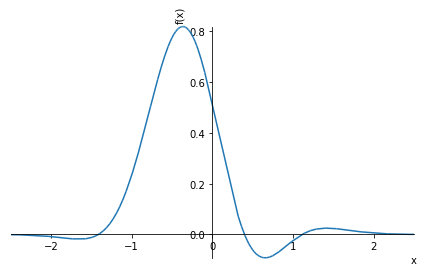

In [7]:
p = plot( re(ch2.subs({t:0.6})), label="coherent", xlim=[-2.5,2.5], show=False )
p.show()

The following cells produce a movie of the time evolution:

In [8]:
%%capture
ch2=coherent(alpha, 8)
fig, ax = plt.subplots();
ax.set_xlim(( -3, 3))
ax.set_ylim((-0.5, 1.5))
line, = ax.plot([], [])

In [9]:
def init():
    line.set_data([], [])
    return (line,)

In [10]:
def animate(i):
    global x
    chn=lambdify(x, ch2.subs({t:i/50.0}))
    xv = np.linspace(-3, 3, 100)
    yv = np.abs( np.array(list(map(lambda v: chn(v), xv))) )
    line.set_data(xv, yv)
    return (line,)

In [11]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, 
                               blit=True)

In [12]:
HTML(anim.to_jshtml())

An important property of these moving wave packets is that they do not spread in time.

Questions? kasper.peeters@durham.ac.uk